

# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’

### Question that can analyised from this data set

* Question that can analyised from this data set
* what is the attendence and abscence rate?
* To How extent genders type effect on showing?
* Influence if patient age on attendence or abscence?
* Influence of other factors Disease, SMS-sending on Attendencs?


### Dataset Description 

We have a CSV file contains the data we are going to analyze

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. .

### General Properties

describe general properties of dataset.

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

Dataset consist if 110527 Rows and 14 Columns.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Previous table show brief for statistics of dataset

In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

There is no duplicated Rows for dataset


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
# rename column names
df.rename(columns={'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 'Gender': 'gender', 
                   'ScheduledDay': 'scheduled_day','AppointmentDay': 'appointment_day','Age': 'age', 
                   'Neighbourhood': 'neighbourhood', 'Scholarship': 'scholarship', 'Hipertension': 'hypertension',
                   'Handcap': 'handicap', 'Diabetes': 'diabetes', 'Alcoholism': 'alcoholism', 
                   'SMS_received': 'sms_received', 'No-show': 'no_show'
                  }, inplace=True)

In [9]:
# removing the outliers
df = df[(df['age'] >= 0) & (df['age'] <= 100)]
df.shape

(110519, 14)

Removing age outlier to make analysis more reasonable.

In [10]:
# removing duplicated Id with same status of showing
df.drop_duplicates(['patient_id', 'no_show'],inplace=True)
df.shape

(71811, 14)

In [11]:
# converting some columns that has date to a datetime datatype
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What is the attendence and abscence rate?)

attendence and abscence rate visualize percentage of appointments showed and non-showed.

In [12]:
df.no_show[df['no_show'] == 'Yes'] = '1'
df.no_show[df['no_show'] == 'No'] = '0'
df['no_show'] = pd.to_numeric(df['no_show'])

In [13]:
# create a mask for people who came
showed = df['no_show'] == 0
not_showed = df['no_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

24.5951177396


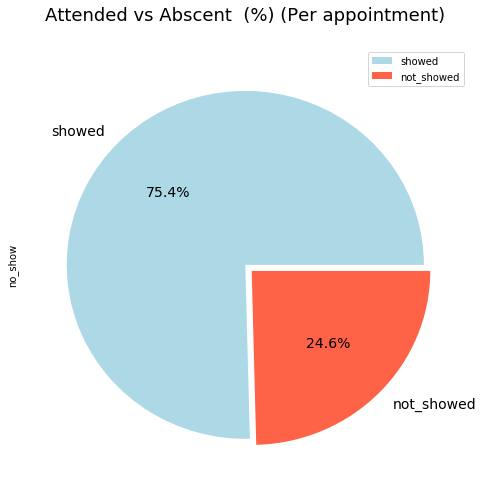

In [14]:
Total = df['no_show'].value_counts()
print(Total[1] / Total.sum() * 100)
colors = ['lightblue', 'tomato']
labels = ['showed', 'not_showed']
explode = (0, 0.05)
pieChart = Total.plot.pie(figsize=(8,8), autopct='%1.1f%%', explode=explode, labels=labels, colors=colors,fontsize = 14);
pieChart.set_title("Attended vs Abscent " + ' (%) (Per appointment)\n', fontsize = 18);
plt.legend();

as showing in pie-chart 75.4% of appointments were being showed and 24.6% were not being showed.

##### classifying attendence and abscence by gender

In [15]:
# group by gender and count the shows and no shows
gender_type = df.groupby('gender').no_show.value_counts()
gender_type

gender  no_show
F       0          34956
        1          11505
M       0          19193
        1           6157
Name: no_show, dtype: int64

34956 appoinments for femals were being  showed and 19193 of males were being showed

### Research Question 2  (To How extent genders type effect on showing?)

describe if there is relation between genders and showing appointments or not.

Text(0,0.5,'Appointments Number')

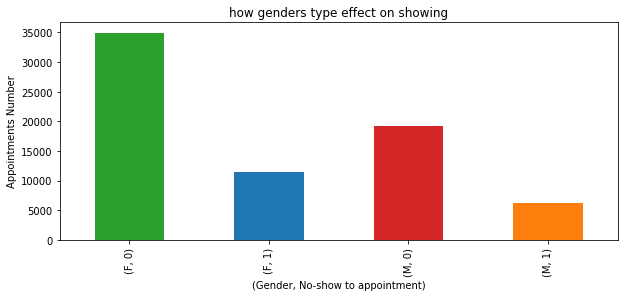

In [16]:
# plot the graph
gender_type.plot(kind='bar', figsize=(10,4), color = ['#2BA02C', '#2077B4', '#D62728', '#FF7F0E'])
plt.title('how genders type effect on showing')
plt.xlabel('(Gender, No-show to appointment)')
plt.ylabel('Appointments Number')

      * Femals have both greater count in both status showing and non-showing
      * both femals and males have the same status of showing and non showing

### Research Question 3 ( Influence patient`s age on attendence or abscence?)


describe if ageing influence showing status.

In [17]:
# creating age category
age_category = [15, 30, 45, 60, 75, 90, 105]
df['age_category'] = pd.cut(df.age, age_category)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed,not_showed,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False,"(60, 75]"
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False,"(45, 60]"
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False,"(60, 75]"
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False,NaN
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False,"(45, 60]"


In [18]:
# filter by no-shown appointments which Yes represesnted by (1)
Abscent_age_data = df.query('no_show == 1').groupby('age_category').no_show.value_counts()
Abscent_age_data

age_category  no_show
(15, 30]      1          4083
(30, 45]      1          3640
(45, 60]      1          3309
(60, 75]      1          1747
(75, 90]      1           651
(90, 105]     1            45
Name: no_show, dtype: int64

In [19]:
age_abscent_count = {}
for index in range(0,len(age_category)-1):
    category = "({},{}]".format(age_category[index], age_category[index+1])
    age = Abscent_age_data.values[index]
    age_abscent_count.update({category: age})
age_abscent_count

{'(15,30]': 4083,
 '(30,45]': 3640,
 '(45,60]': 3309,
 '(60,75]': 1747,
 '(75,90]': 651,
 '(90,105]': 45}

Text(0,0.5,'appointment`s Number')

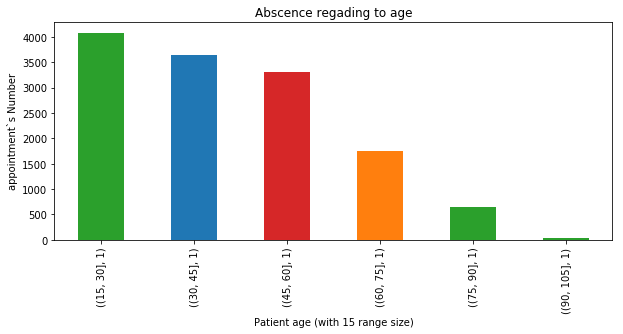

In [20]:
# plot a graph of no-shown as a function of age
Abscent_age_data.plot(kind='bar', figsize=(10,4), color= ['#2BA02C', '#2077B4', '#D62728', '#FF7F0E'])
plt.title('Abscence regading to age')
plt.xlabel('Patient age (with 15 range size)')
plt.ylabel('appointment`s Number')

           patient ages has inversely proportional with showing status 


### Research Question 4 (Other Factors Influence patient`s age on attendence or abscence?)

### 1- Scholarship

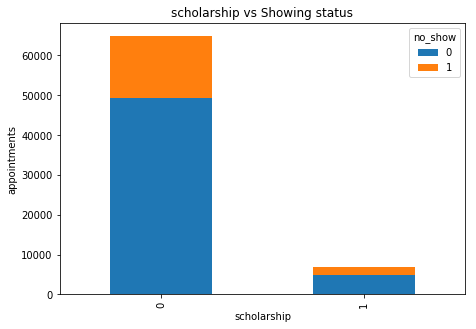

In [21]:
# First, let's look at categorical variables
scholarship = ['scholarship']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(scholarship):
    ax = fig.add_subplot(2, 2, i+1)
    df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)
    plt.title('scholarship vs Showing status')
    plt.xlabel('scholarship')
    plt.ylabel('appointments')

    Graph show relation between scholarship and showing status.


### 2- Chronic disease 


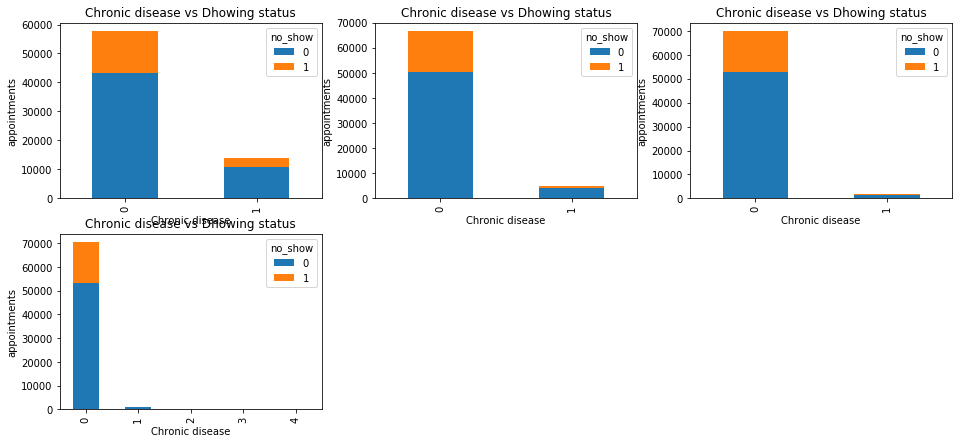

In [24]:
# First, let's look at categorical variables
Chronic_disease = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(Chronic_disease):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)
    plt.title('Chronic disease vs Dhowing status')
    plt.xlabel('Chronic disease')
    plt.ylabel('appointments')

     Graph show relation between Chronic diseases and showing status.

### 3- sms_received


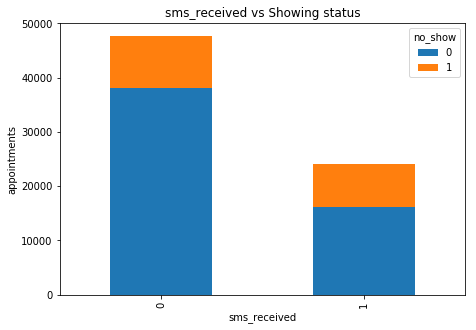

In [25]:
# First, let's look at categorical variables
sms_received = ['sms_received']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(sms_received):
    ax = fig.add_subplot(2, 2, i+1)
    df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)
    plt.title('sms_received vs Showing status')
    plt.xlabel('sms_received')
    plt.ylabel('appointments')

    Graph show relation between sms_receiving and showing status.


<a id='conclusions'></a>
## Conclusions

##### Findings
* 75.4 % of patients haven`t been showed and just 24.6% have been showed

##### Regarding to Age:
* Average ages of patients those have been showed and non showed so close
* Showing status is inversely proportional with patient ages as we noticed that with aging non-showing status is increased

##### Regarding to Gender
* Femals have both greater count in both status showing and non-showing
* both femals and males have the same status of showing and non showing
* Gender didn`t influence showing status

##### Other Factors
* Scholarship and SMS-receiving have not any noticed changes on showing status
* Patient aren not suffered from any chromic disease are greater than suffering patient but chronic diseases have not any influencing on showing status



### limitations

* There were not reasons for no_show appointment which make analysis need more explanation
* There was no explanation of how the data was collected, and if it was collected in a way that makes these analyses more reliable.
* dataset neglected How long time between receiving SMS and appointment of show. to judge on ability to attened
* The dataset didn't explain variaty of clinics or its department to can make conclusion about rates for each clinic.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0